## Naive Bayes

### Fake News Detection

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

### Read Dataset

In [2]:
fake = pd.read_csv('Fake.csv')
true = pd.read_csv('True.csv')

In [3]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [4]:
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [5]:
fake.shape

(23481, 4)

In [6]:
true.shape

(21417, 4)

### Data Cleaning and Preparation

In [7]:
# Add flag to track fake and real
fake['target'] = 'fake'
true['target'] = 'true'

In [8]:
df = pd.concat([fake, true]).reset_index(drop=True)

In [9]:
df.head()

,title,text,subject,date,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",fake


In [10]:
df.shape

(44898, 5)

In [11]:
#shuffle  the data
from sklearn.utils import shuffle

In [12]:
df = shuffle(df)
df = df.reset_index(drop= True)

In [13]:
df.head()

,title,text,subject,date,target
0,During Russia Meeting Trump Explicitly Bragge...,In a meeting Trump held with two Russian offic...,News,"May 19, 2017",fake
1,"Bernie Sanders-style, grassroots effort a like...",NEW YORK (Reuters) - Donald Trump’s presidenti...,politicsNews,"June 9, 2016",true
2,OBAMA’S COMMUNIST CRONY Van Jones Worries Abou...,,politics,"Nov 9, 2016",fake
3,ECONOMIC SYSTEMS BRILLIANTLY EXPLAINED WITH COWS,Share this with everyone! There s a good reaso...,left-news,"Apr 16, 2016",fake
4,Contrasting realities in Libya for French mini...,"TRIPOLI/BENGHAZI, Libya (Reuters) - A hundred ...",worldnews,"December 22, 2017",true


In [14]:
df.drop(['date'], axis=1, inplace=True)

In [15]:
df.head()

,title,text,subject,target
0,During Russia Meeting Trump Explicitly Bragge...,In a meeting Trump held with two Russian offic...,News,fake
1,"Bernie Sanders-style, grassroots effort a like...",NEW YORK (Reuters) - Donald Trump’s presidenti...,politicsNews,true
2,OBAMA’S COMMUNIST CRONY Van Jones Worries Abou...,,politics,fake
3,ECONOMIC SYSTEMS BRILLIANTLY EXPLAINED WITH COWS,Share this with everyone! There s a good reaso...,left-news,fake
4,Contrasting realities in Libya for French mini...,"TRIPOLI/BENGHAZI, Libya (Reuters) - A hundred ...",worldnews,true


In [16]:
df.drop(['title'], axis=1, inplace=True)

In [17]:
df.shape

(44898, 3)

In [18]:
df.head()

,text,subject,target
0,In a meeting Trump held with two Russian offic...,News,fake
1,NEW YORK (Reuters) - Donald Trump’s presidenti...,politicsNews,true
2,,politics,fake
3,Share this with everyone! There s a good reaso...,left-news,fake
4,"TRIPOLI/BENGHAZI, Libya (Reuters) - A hundred ...",worldnews,true


In [19]:
# Convert to Lowercase

In [20]:
df['text'] = df['text'].apply(lambda x: x.lower())

In [21]:
df.head()

,text,subject,target
0,in a meeting trump held with two russian offic...,News,fake
1,new york (reuters) - donald trump’s presidenti...,politicsNews,true
2,,politics,fake
3,share this with everyone! there s a good reaso...,left-news,fake
4,"tripoli/benghazi, libya (reuters) - a hundred ...",worldnews,true


In [22]:
df['subject'].uniqueque()

array(['News', 'politicsNews', 'politics', 'left-news', 'worldnews',
       'Middle-east', 'Government News', 'US_News'], dtype=object)

In [24]:
# Remove Punctuation
import string

def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str

df['text'] = df['text'].apply(punctuation_removal)

In [25]:
# Removing Stopword

In [26]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to C:\Users\shyam.DESKTOP-3E
[nltk_data]     M50G2\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [28]:
df.head(10)

,text,subject,target
0,meeting trump held two russian officials behes...,News,fake
1,new york reuters donald trump’s presidential c...,politicsNews,true
2,,politics,fake
3,share everyone good reason exception obama yea...,left-news,fake
4,tripolibenghazi libya reuters hundred meters o...,worldnews,true
5,alex jones rightwing site infowars stranger in...,News,fake
6,realm nba spurs head coach gregg popovich one ...,politics,fake
7,benghazi libya reuters government based easter...,worldnews,true
8,london reuters two influential us congressmen ...,politicsNews,true
9,well know pipe bombs laying floor think regula...,politics,fake


In [29]:
print(df.groupby(['subject'])['text'].count())

subject
Government News     1570
Middle-east          778
News                9050
US_News              783
left-news           4459
politics            6841
politicsNews       11272
worldnews          10145
Name: text, dtype: int64


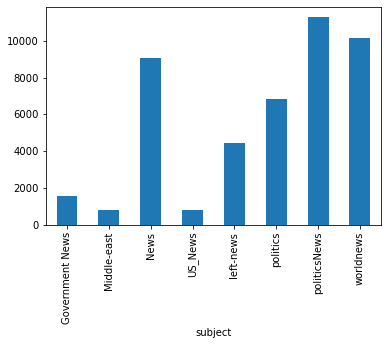

In [30]:
df.groupby(['subject'])['text'].count().plot(kind = 'bar')
plt.show()

In [31]:
print(df.groupby(['target'])['text'].count())

target
fake    23481
true    21417
Name: text, dtype: int64


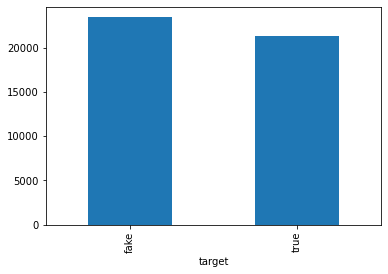

In [32]:
df.groupby(['target'])['text'].count().plot(kind = 'bar')
plt.show()

In [33]:
# Word Cloud for fake news

In [35]:
from wordcloud import WordCloud

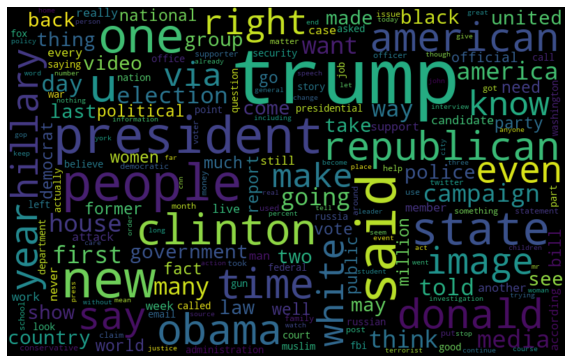

In [36]:
fake_data = df[df['target'] == 'fake']
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height=500, max_font_size=110, collocations= False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

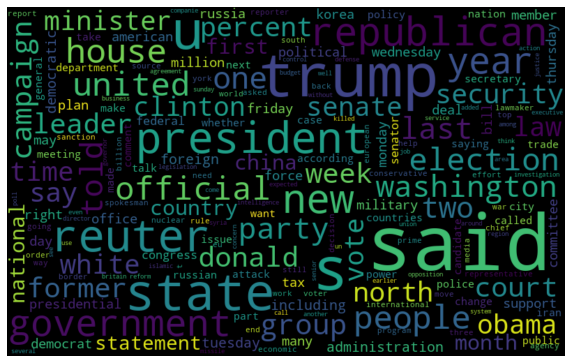

In [37]:
true_data = df[df['target'] == 'true']
all_words = ' '.join([text for text in true_data.text])

wordcloud = WordCloud(width= 800, height=500, max_font_size=110, collocations= False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()